In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv("Data_Processed/Recommendation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          97233 non-null  object 
 1   Crop_Type           97233 non-null  object 
 2   Crop                97233 non-null  object 
 3   N                   97233 non-null  int64  
 4   P                   97233 non-null  int64  
 5   K                   97233 non-null  int64  
 6   pH                  97233 non-null  float64
 7   rainfall            97233 non-null  float64
 8   temperature         97233 non-null  float64
 9   Area_in_hectares    97233 non-null  float64
 10  Production_in_tons  97233 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.2+ MB


In [3]:
df = df.drop(["Production_in_tons"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  object 
 1   Crop_Type         97233 non-null  object 
 2   Crop              97233 non-null  object 
 3   N                 97233 non-null  int64  
 4   P                 97233 non-null  int64  
 5   K                 97233 non-null  int64  
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.4+ MB


In [4]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0
1,andhra pradesh,kharif,horse-gram,20,60,20,6.18,654.34,29.266667,3300.0
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0


Data Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  object 
 1   Crop_Type         97233 non-null  object 
 2   Crop              97233 non-null  object 
 3   N                 97233 non-null  int64  
 4   P                 97233 non-null  int64  
 5   K                 97233 non-null  int64  
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.4+ MB


Encoding and Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C = ["State_Name","Crop_Type","Crop"]
le_D = {}
for i in C:
    le_D[i] = LabelEncoder()
    df[i] = le_D[i].fit_transform(df[i])

bulk_scaler = StandardScaler()
features_to_scale = ["State_Name","Crop_Type","N","P","K","pH","rainfall","temperature","Area_in_hectares"]
#features_to_scale = ["N","P","K","pH","rainfall","temperature","Area_in_hectares"]
df[features_to_scale] = bulk_scaler.fit_transform(df[features_to_scale])

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  float64
 1   Crop_Type         97233 non-null  float64
 2   Crop              97233 non-null  int32  
 3   N                 97233 non-null  float64
 4   P                 97233 non-null  float64
 5   K                 97233 non-null  float64
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 7.0 MB


State_Name             33
Crop_Type               4
Crop                   28
N                      14
P                       8
K                      12
pH                     82
rainfall              111
temperature           109
Area_in_hectares    26283
dtype: int64

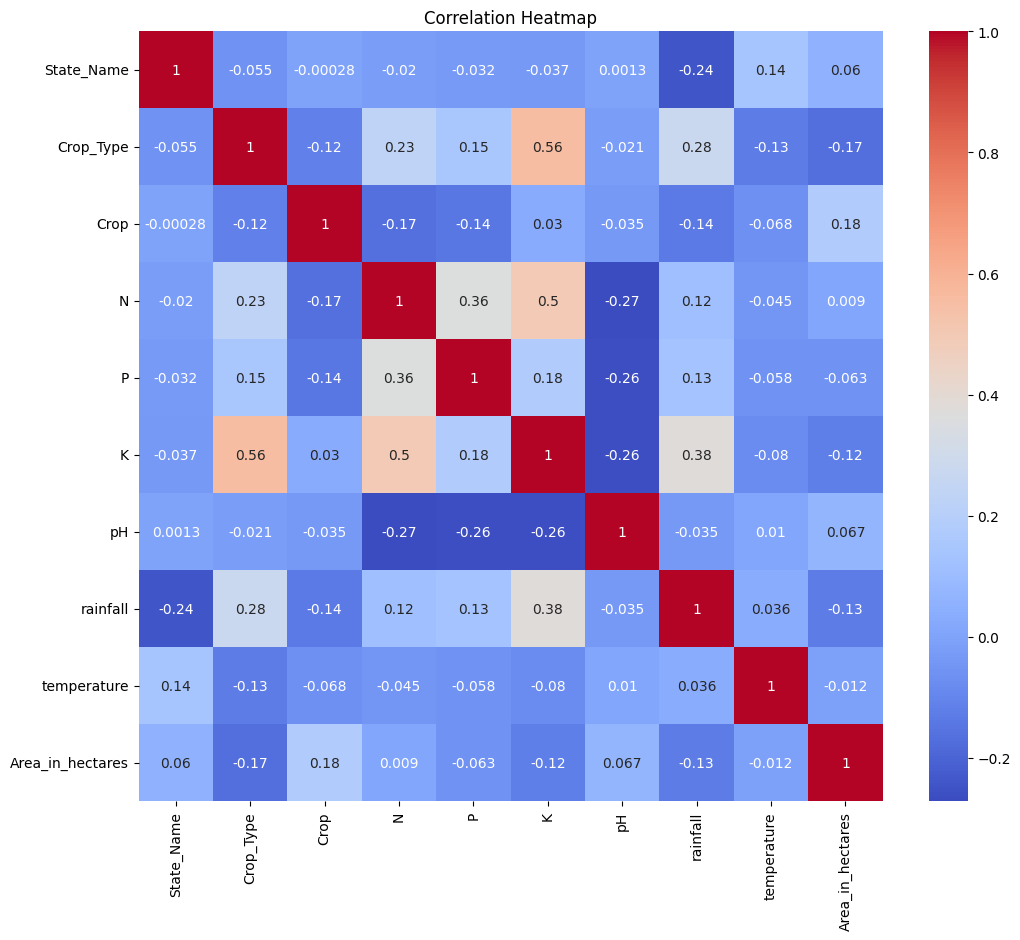

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X = df[features_to_scale].values
y = df["Crop"].values

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
# from imblearn.over_sampling import RandomOverSampler,SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek
# from imblearn.combine import SMOTEENN

X = df[features_to_scale].values
y = df["Crop"].values
n_n = 5
algorithm = "brute"
metric = "cosine"

def KNN_trainer(X,y,ROSample,model):
    X,y = ROSample.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c = accuracy_score(y_test,y_pred)
    d = precision_score(y_test,y_pred,average="macro",zero_division=1)
    e = f1_score(y_test,y_pred,average="macro")
    f = recall_score(y_test,y_pred,average="macro")

    print("KNN for {} algorithm and {} metric and {} neighbors".format(algorithm,metric,n_n))
    print("accuracy:-",c*100)
    print("precision:-",d*100)
    print("f1_score:-",e*100)
    print("recall_score:-",f*100)


print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("KNN for {} algorithm and {} metric and {} neighbors".format(algorithm,metric,n_n))
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
KNN_trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
KNN_trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
KNN_trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
KNN_trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = KNeighborsClassifier(n_neighbors=n_n,algorithm=algorithm,metric=metric)
KNN_trainer(X,y,ROSample,model)


Normal
KNN for brute algorithm and cosine metric and 5 neighbors
accuracy:- 96.34390908623438
precision:- 97.09203669060388
f1_score:- 95.15998433254941
recall_score:- 94.43404446551665
Ranodom Over Sampling
KNN for brute algorithm and cosine metric and 5 neighbors
accuracy:- 98.72984626921635
precision:- 98.74480051967642
f1_score:- 98.70633477949741
recall_score:- 98.73734541993208
Ranodom Under Sampling
KNN for brute algorithm and cosine metric and 5 neighbors
accuracy:- 75.24752475247524
precision:- 74.06462585034015
f1_score:- 64.6763553906411
recall_score:- 69.9702380952381
SMOTE
KNN for brute algorithm and cosine metric and 5 neighbors
accuracy:- 98.61111111111111
precision:- 98.6406141353138
f1_score:- 98.59634500889098
recall_score:- 98.61791578886522
SMOTE+TOMEK
KNN for brute algorithm and cosine metric and 5 neighbors
accuracy:- 99.11203476289438
precision:- 99.0633134734169
f1_score:- 99.03083959070543
recall_score:- 99.03246870845209
SMOTE+ENN
KNN for brute algorithm and c

In [18]:
from sklearn.linear_model import LogisticRegression


def trainer(X,y,ROSample,model):
    X,y = ROSample.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c = accuracy_score(y_test,y_pred)
    d = precision_score(y_test,y_pred,average="macro",zero_division=1)
    e = f1_score(y_test,y_pred,average="macro")
    f = recall_score(y_test,y_pred,average="macro")

    print("accuracy:-",c*100)
    print("precision:-",d*100)
    print("f1_score:-",e*100)
    print("recall_score:-",f*100)

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = LogisticRegression()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = LogisticRegression()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = LogisticRegression()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = LogisticRegression()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = LogisticRegression()
trainer(X,y,ROSample,model)

Normal
accuracy:- 93.94765259423046
precision:- 93.86067001688573
f1_score:- 91.44735967290615
recall_score:- 90.87758694047459
Ranodom Over Sampling


c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:- 96.09580052493439
precision:- 96.12121292608101
f1_score:- 96.01520064178295
recall_score:- 96.10171270632392
Ranodom Under Sampling
accuracy:- 92.07920792079209
precision:- 91.96428571428571
f1_score:- 89.67120181405896
recall_score:- 91.48809523809524
SMOTE


c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:- 95.90832395950505
precision:- 95.94882305635124
f1_score:- 95.8381713673985
recall_score:- 95.9133448153554
SMOTE+TOMEK


c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:- 96.3882547429741
precision:- 96.14775328298573
f1_score:- 96.0301514595516
recall_score:- 96.10566547721149
SMOTE+ENN
accuracy:- 97.39861173597275
precision:- 96.48354317545719
f1_score:- 96.3824748199003
recall_score:- 96.38365930180932


In [19]:
from sklearn.svm import SVC

def trainer(X,y,ROSample,model):
    X,y = ROSample.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c = accuracy_score(y_test,y_pred)
    d = precision_score(y_test,y_pred,average="macro",zero_division=1)
    e = f1_score(y_test,y_pred,average="macro")
    f = recall_score(y_test,y_pred,average="macro")

    print("accuracy:-",c*100)
    print("precision:-",d*100)
    print("f1_score:-",e*100)
    print("recall_score:-",f*100)

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = SVC(probability=True)
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = SVC(probability=True)
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = SVC(probability=True)
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = SVC(probability=True)
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = SVC(probability=True)
trainer(X,y,ROSample,model)

Normal
accuracy:- 95.52116007610428
precision:- 96.77947564495682
f1_score:- 94.25250601324458
recall_score:- 93.31611705053291
Ranodom Over Sampling
accuracy:- 97.8424571928509
precision:- 97.95448230709157
f1_score:- 97.79555379539036
recall_score:- 97.85388870487853
Ranodom Under Sampling
accuracy:- 88.11881188118812
precision:- 87.6360544217687
f1_score:- 84.3446930054073
recall_score:- 86.34920634920634
SMOTE
accuracy:- 97.88932633420822
precision:- 98.00392403408567
f1_score:- 97.83703060256602
recall_score:- 97.90097738893887
SMOTE+TOMEK
accuracy:- 98.2883237540351
precision:- 98.31876850731447
f1_score:- 98.10846155381405
recall_score:- 98.14211138778035
SMOTE+ENN
accuracy:- 99.11812895556912
precision:- 98.80588657347418
f1_score:- 98.77350334958366
recall_score:- 98.77678545875006


In [10]:
def trainer(X,y,ROSample,model):
    X,y = ROSample.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c = accuracy_score(y_test,y_pred)
    d = precision_score(y_test,y_pred,average="macro",zero_division=1)
    e = f1_score(y_test,y_pred,average="macro")
    f = recall_score(y_test,y_pred,average="macro")

    print("accuracy:-",c*100)
    print("precision:-",d*100)
    print("f1_score:-",e*100)
    print("recall_score:-",f*100)

In [11]:
from sklearn.tree import DecisionTreeClassifier

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = DecisionTreeClassifier()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = DecisionTreeClassifier()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = DecisionTreeClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = DecisionTreeClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = DecisionTreeClassifier()
trainer(X,y,ROSample,model)

Normal
accuracy:- 96.23078109734149
precision:- 96.87830219951691
f1_score:- 96.92198894979909
recall_score:- 96.9698690845805
Ranodom Over Sampling
accuracy:- 99.21728533933259
precision:- 99.2293584395836
f1_score:- 99.21082797808172
recall_score:- 99.22262432294536
Ranodom Under Sampling
accuracy:- 95.04950495049505
precision:- 95.53571428571429
f1_score:- 94.44444444444444
recall_score:- 94.28571428571428
SMOTE
accuracy:- 98.46425446819148
precision:- 98.4662002315959
f1_score:- 98.4652288434456
recall_score:- 98.46689915122232
SMOTE+TOMEK
accuracy:- 99.08534185544939
precision:- 98.9939530593536
f1_score:- 98.99432402238261
recall_score:- 98.99763466579998
SMOTE+ENN
accuracy:- 99.83935226834598
precision:- 99.78341062364923
f1_score:- 99.77894172519294
recall_score:- 99.77496083184782


In [12]:
from sklearn.ensemble import RandomForestClassifier

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = RandomForestClassifier()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = RandomForestClassifier()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = RandomForestClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = RandomForestClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = RandomForestClassifier()
trainer(X,y,ROSample,model)

Normal
accuracy:- 96.59073378927341
precision:- 97.25817624998298
f1_score:- 97.17587796896055
recall_score:- 97.09997589666077
Ranodom Over Sampling
accuracy:- 99.18760154980627
precision:- 99.21299027563731
f1_score:- 99.1799633141663
recall_score:- 99.19373088714983
Ranodom Under Sampling
accuracy:- 97.02970297029702
precision:- 97.02380952380952
f1_score:- 96.56462585034014
recall_score:- 97.85714285714285
SMOTE
accuracy:- 98.72984626921635
precision:- 98.72986103270668
f1_score:- 98.72640843624684
recall_score:- 98.73352290754644
SMOTE+TOMEK
accuracy:- 99.27431287976577
precision:- 99.22141651390349
f1_score:- 99.21067579280496
recall_score:- 99.20897622830913
SMOTE+ENN
accuracy:- 99.88272338784822
precision:- 99.84043608659606
f1_score:- 99.8415322278729
recall_score:- 99.84279866331785


In [13]:
from xgboost import XGBClassifier


print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = XGBClassifier()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = XGBClassifier()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = XGBClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = XGBClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = XGBClassifier()
trainer(X,y,ROSample,model)

Normal
accuracy:- 96.95582866251864
precision:- 97.46217524112103
f1_score:- 97.32591689700237
recall_score:- 97.21157714493704
Ranodom Over Sampling
accuracy:- 98.85483064616923
precision:- 98.89251134699505
f1_score:- 98.83497202158627
recall_score:- 98.86271113010011
Ranodom Under Sampling
accuracy:- 95.04950495049505
precision:- 95.95238095238095
f1_score:- 94.24036281179139
recall_score:- 95.35714285714286
SMOTE
accuracy:- 98.70016247969004
precision:- 98.73073102234967
f1_score:- 98.68487080761106
recall_score:- 98.70681211759329
SMOTE+TOMEK
accuracy:- 99.18132153596675
precision:- 99.1297391643785
f1_score:- 99.10173711912506
recall_score:- 99.10235037843462
SMOTE+ENN
accuracy:- 99.87793517715461
precision:- 99.83575165533904
f1_score:- 99.8344028901044
recall_score:- 99.8336725748776


In [14]:
from sklearn.naive_bayes import GaussianNB

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = GaussianNB()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = GaussianNB()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = GaussianNB()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = GaussianNB()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = GaussianNB()
trainer(X,y,ROSample,model)

Normal
accuracy:- 91.42284156939373
precision:- 94.38851845602565
f1_score:- 93.93186598154128
recall_score:- 95.5753258063103
Ranodom Over Sampling
accuracy:- 94.51162354705662
precision:- 94.4117846034046
f1_score:- 93.86803779368394
recall_score:- 94.50975201186608
Ranodom Under Sampling
accuracy:- 94.05940594059405
precision:- 94.10714285714286
f1_score:- 92.78911564625851
recall_score:- 92.32142857142858
SMOTE
accuracy:- 94.63192100987376
precision:- 94.86401807289502
f1_score:- 93.94004358702198
recall_score:- 94.63050669270446
SMOTE+TOMEK
accuracy:- 95.16281413365245
precision:- 94.7759113174454
f1_score:- 93.97188491822311
recall_score:- 94.65083100326113
SMOTE+ENN
accuracy:- 96.54430074704796
precision:- 95.25729808714006
f1_score:- 94.74788679295958
recall_score:- 95.09826013742969


In [15]:
from lightgbm import LGBMClassifier

print("Normal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c = accuracy_score(y_test,y_pred)
d = precision_score(y_test,y_pred,average="macro",zero_division=1)
e = f1_score(y_test,y_pred,average="macro")
f = recall_score(y_test,y_pred,average="macro")
print("accuracy:-",c*100)
print("precision:-",d*100)
print("f1_score:-",e*100)
print("recall_score:-",f*100)


print("Ranodom Over Sampling")
ROSample = RandomOverSampler(sampling_strategy="all")
model = LGBMClassifier()
trainer(X,y,ROSample,model)

print("Ranodom Under Sampling")
ROSample = RandomUnderSampler(sampling_strategy="all")
model = LGBMClassifier()
trainer(X,y,ROSample,model)

print("SMOTE")
ROSample = SMOTE()
model = LGBMClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+TOMEK")
ROSample = SMOTETomek()
model = LGBMClassifier()
trainer(X,y,ROSample,model)

print("SMOTE+ENN")
ROSample = SMOTEENN()
model = LGBMClassifier()
trainer(X,y,ROSample,model)

Normal
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 77786, number of used features: 9
[LightGBM] [Info] Start training from score -4.430843
[LightGBM] [Info] Start training from score -3.708430
[LightGBM] [Info] Start training from score -3.437271
[LightGBM] [Info] Start training from score -5.132667
[LightGBM] [Info] Start training from score -6.074331
[LightGBM] [Info] Start training from score -4.861459
[LightGBM] [Info] Start training from score -3.768956
[LightGBM] [Info] Start training from score -3.420224
[LightGBM] [Info] Start training from score -3.806418
[LightGBM] [Info] Start training from score -8.553667
[LightGBM] [Info] Start training from score -3.560064
[LightGBM] [Info] Start training from score -2.8